


# **CLASSIFICATION MODELS**




**Aim:** To implement various classification models on the heart stroke dataset.

**Dataset:** https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

**Context:**
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

**Attribute Information:**
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not

**Description:**
**Logistic Regression**
A statistical method used for binary classification problems that predicts the probability of an input belonging to a certain class by fitting the data to a logistic curve.  

**K-Nearest Neighbors (KNN)**
A non-parametric, instance-based learning algorithm that classifies new data points based on the majority label of the ‘k’ nearest points from the training dataset.  

**Naive Bayes** A probabilistic classifier based on Bayes’ Theorem, assuming independence between features. It is particularly effective for text classification and problems with a large feature space.  

**Decision Tree** A flowchart-like tree structure where internal nodes represent tests on features, branches represent the outcomes of the tests, and leaf nodes represent class labels. It is easy to interpret and visualize.  

**Random Forest** An ensemble learning method that constructs multiple decision trees during training and outputs the mode of the classes for classification or mean prediction for regression. It reduces overfitting and improves accuracy.  

**Bagging** An ensemble technique that improves the stability and accuracy of machine learning algorithms by training multiple models on random subsets of the data and aggregating their predictions. Random Forest is a popular implementation of bagging.

**Boosting** An ensemble technique that combines multiple weak learners to form a strong learner by sequentially training models, each correcting the errors of its predecessor. Popular boosting algorithms include AdaBoost and Gradient Boosting.  

**Voting** An ensemble method where multiple models (often of different types) are trained and their predic- tions are combined by averaging (for regression) or by majority vote (for classification), improving robustness and accuracy.  

**Support Vector Machine (SVM)** A supervised learning model that finds the hyperplane best separating data into classes by maxi- mizing the margin between different classes, performing well in high-dimensional spaces.

Loading dataset

In [ ]:
# importing libraries for data handling and analysis
import pandas as pd
import numpy as np

In [ ]:
# importing libraries for data visualisations
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline

In [ ]:
import pandas as pd

df_sourcefile = pd.read_csv(
    "/content/sample_data/healthcare-dataset-stroke-data.csv")
df_sourcefile.shape

(556, 12)

In [ ]:
# Making a copy of the original sourcefile
df= df_sourcefile.copy()

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Preprocessing

In [ ]:
#checking null values
df.isnull().sum()

id                    0
gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  46
smoking_status        0
stroke                0
dtype: int64

In [ ]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

In [ ]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
col=["gender","ever_married","work_type","Residence_type", "smoking_status"]
df[col]=df[col].apply(LabelEncoder().fit_transform)

In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,30.240196,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
551,67780,0,76.0,0,0,1,2,1,183.34,39.500000,1,0
552,68275,1,52.0,0,0,1,2,1,247.69,35.100000,0,0
553,13129,0,55.0,0,0,1,3,0,76.20,27.900000,2,0
554,60902,1,5.0,0,0,0,4,0,71.43,19.300000,0,0


Scaling

In [ ]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 5))
df_col = list(df.columns)
df_col.remove('stroke')
for col in df_col:
    df[col] = df[col].astype(float)
    df[[col]] = scaler.fit_transform(df[[col]])
df['stroke'] = pd.to_numeric(df['stroke'], downcast='float')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.612524,5.0,4.078171,0.0,5.0,5.0,2.50,5.0,4.005084,1.962134,1.666667,1.0
1,3.540851,0.0,3.709440,0.0,0.0,5.0,3.75,0.0,3.393113,1.414819,3.333333,1.0
2,2.128275,5.0,4.877089,0.0,5.0,5.0,2.50,0.0,1.167784,1.609294,3.333333,1.0
3,4.125143,0.0,2.971976,0.0,0.0,5.0,2.50,5.0,2.677144,1.772806,5.000000,1.0
4,0.105510,0.0,4.815634,5.0,0.0,5.0,3.75,0.0,2.743933,0.877797,3.333333,1.0


Correlations

<Axes: >

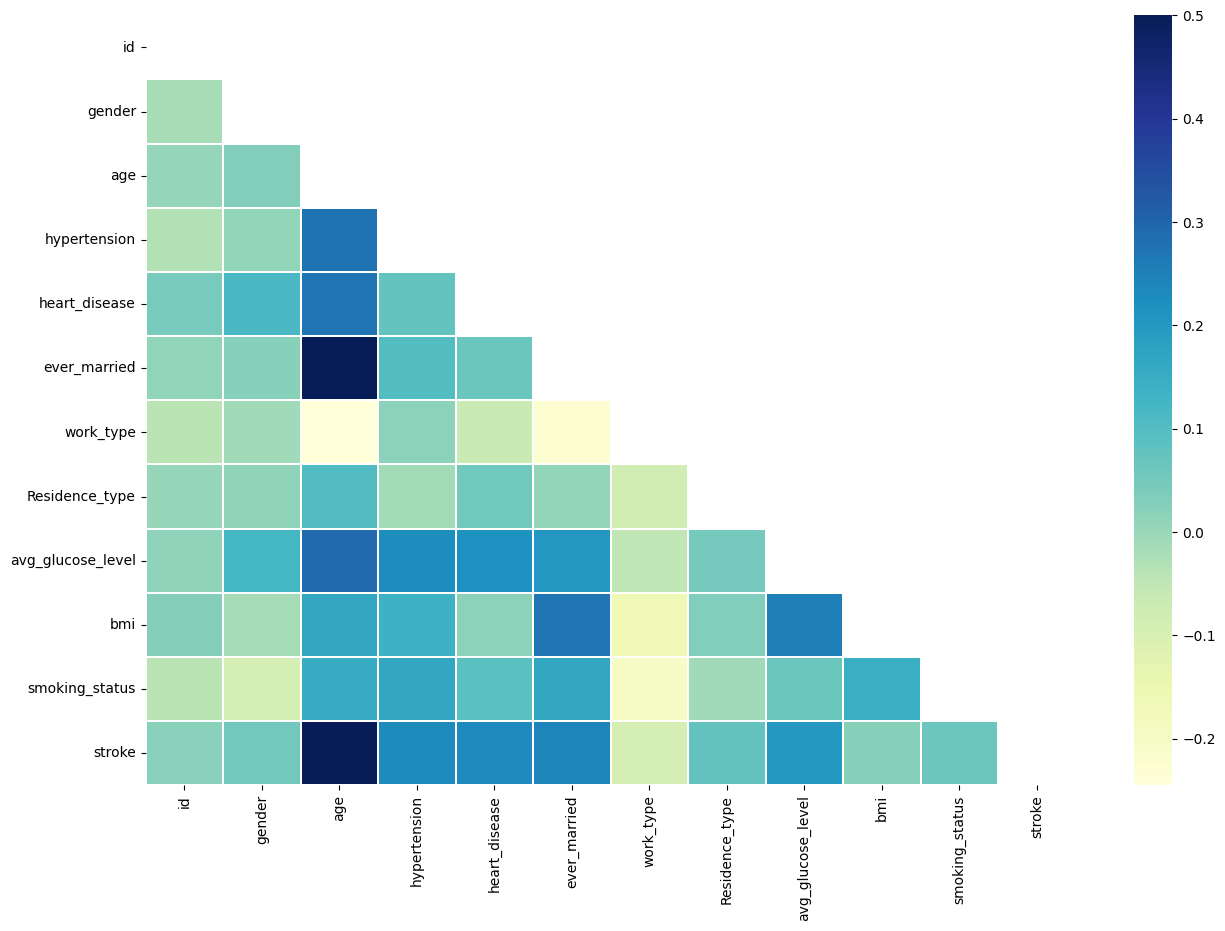

In [ ]:
# Calculate correlations
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            # annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu")

In [ ]:
df_trans = df.copy()
df_trans['Target'] = df_trans['stroke'].apply(
    lambda x: 0 if x == 1.0 else 1)
df_trans = df_trans.drop(
    [ 'stroke', 'id'], axis=1)
correlations = df_trans.corr()['Target'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 smoking_status   -0.062923
gender           -0.053318
bmi              -0.023081
work_type         0.090302
Target            1.000000
Name: Target, dtype: float64

Most Negative Correlations: 
 age                 -0.567578
ever_married        -0.243349
heart_disease       -0.234651
hypertension        -0.230659
avg_glucose_level   -0.203091
Name: Target, dtype: float64


In [ ]:
target = df['stroke'].copy()

In [ ]:
df.drop(['stroke','id'], axis=1, inplace=True)
print('Size of Full dataset is: {}'.format(df.shape))

Size of Full dataset is: (556, 10)


Splitting the dataset

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


# Common sklearn Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
# from sklearn.datasets import make_classification

# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

In [ ]:
# Since we have class imbalance (i.e. more employees with turnover=0 than turnover=1)
# let's use stratify=y to maintain the same ratio as in the training dataset when splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(df,
                                                    target,
                                                    test_size=0.25,
                                                    random_state=7,
                                                    stratify=target)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (417, 10)
Number transactions y_train dataset:  (417,)
Number transactions X_test dataset:  (139, 10)
Number transactions y_test dataset:  (139,)


### Classification Models

#### Logestic regression

In [ ]:
lr = LogisticRegression(solver='liblinear', random_state=7,
                                                         class_weight='balanced')
lr.fit(X_train,y_train)
Y_pred = lr.predict(X_test)

In [ ]:
# all metrics for logestic regression
accuracy_lb=metrics.accuracy_score(y_test,Y_pred)
confusion_lb=metrics.confusion_matrix(y_test,Y_pred)
precision_lb=metrics.precision_score(y_test,Y_pred)
recall_lb=metrics.recall_score(y_test,Y_pred)
f1_lb=metrics.f1_score(y_test,Y_pred)
auc_lb=metrics.roc_auc_score(y_test,Y_pred)

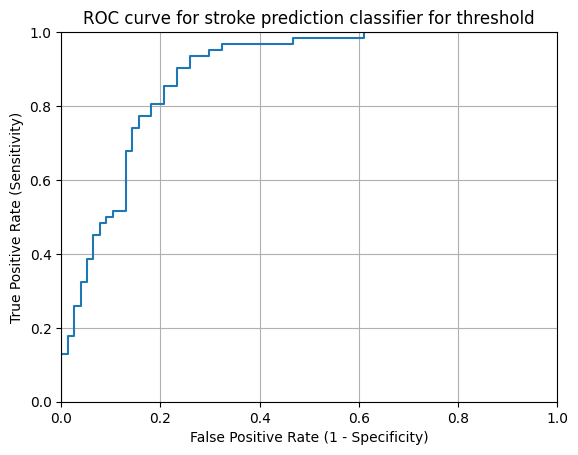

In [ ]:
from sklearn.preprocessing import binarize

y_pred_prob = lr.predict_proba(X_test)[:, 1]
y_pred_class = binarize([y_pred_prob], threshold=0.3)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for stroke prediction classifier for threshold')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

#### KNN

In [ ]:
# KNN
kn=KNeighborsClassifier()
kn.fit(X_train,y_train)
Y_pred = kn.predict(X_test)


In [ ]:
accuracy_kb=metrics.accuracy_score(y_test,Y_pred)
confusion_kb=metrics.confusion_matrix(y_test,Y_pred)
precision_kb=metrics.precision_score(y_test,Y_pred)
recall_kb=metrics.recall_score(y_test,Y_pred)
f1_kb=metrics.f1_score(y_test,Y_pred)
auc_kb=metrics.roc_auc_score(y_test,Y_pred)

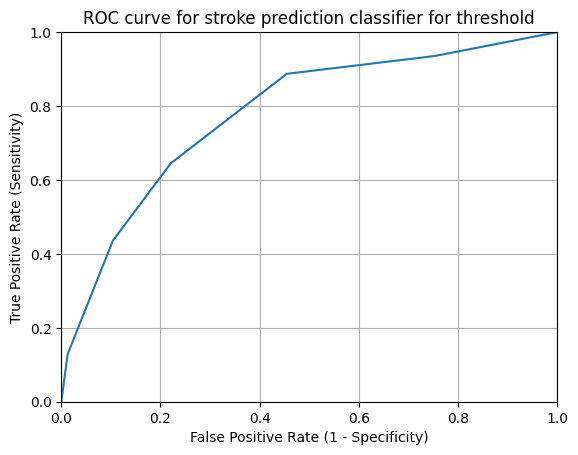

In [ ]:
from sklearn.preprocessing import binarize
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# store the predicted probabilities for class 1
y_pred_prob = kn.predict_proba(X_test)[:, 1]
y_pred_class = binarize([y_pred_prob], threshold=0.3)[0]  # Flattening the result

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for stroke prediction classifier for threshold')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

#### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb=nb.predict(X_test)


In [ ]:
# evaluation metrics of naive bayes classifier
accuracy_n=metrics.accuracy_score(y_test,y_pred_nb)
confusion_n=metrics.confusion_matrix(y_test,y_pred_nb)
precision_n=metrics.precision_score(y_test,y_pred_nb)
recall_n=metrics.recall_score(y_test,y_pred_nb)
f1_n=metrics.f1_score(y_test,y_pred_nb)
auc_n=metrics.roc_auc_score(y_test,y_pred_nb)

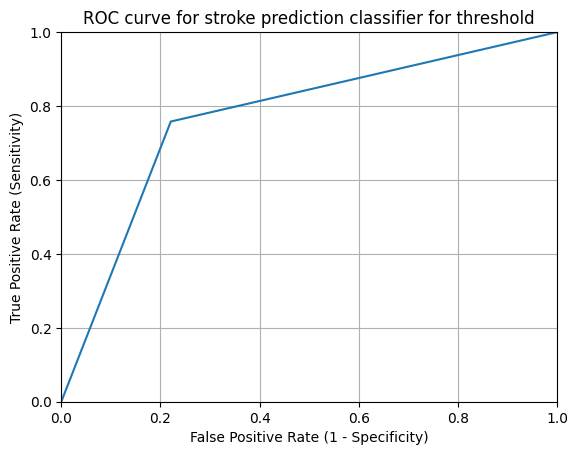

In [ ]:
y_pred_prob = nb.predict_proba(X_test)[:, 1]
y_pred_class = binarize([y_pred_prob], threshold=0.3)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_nb)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for stroke prediction classifier for threshold')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

#### Decision Tree

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)

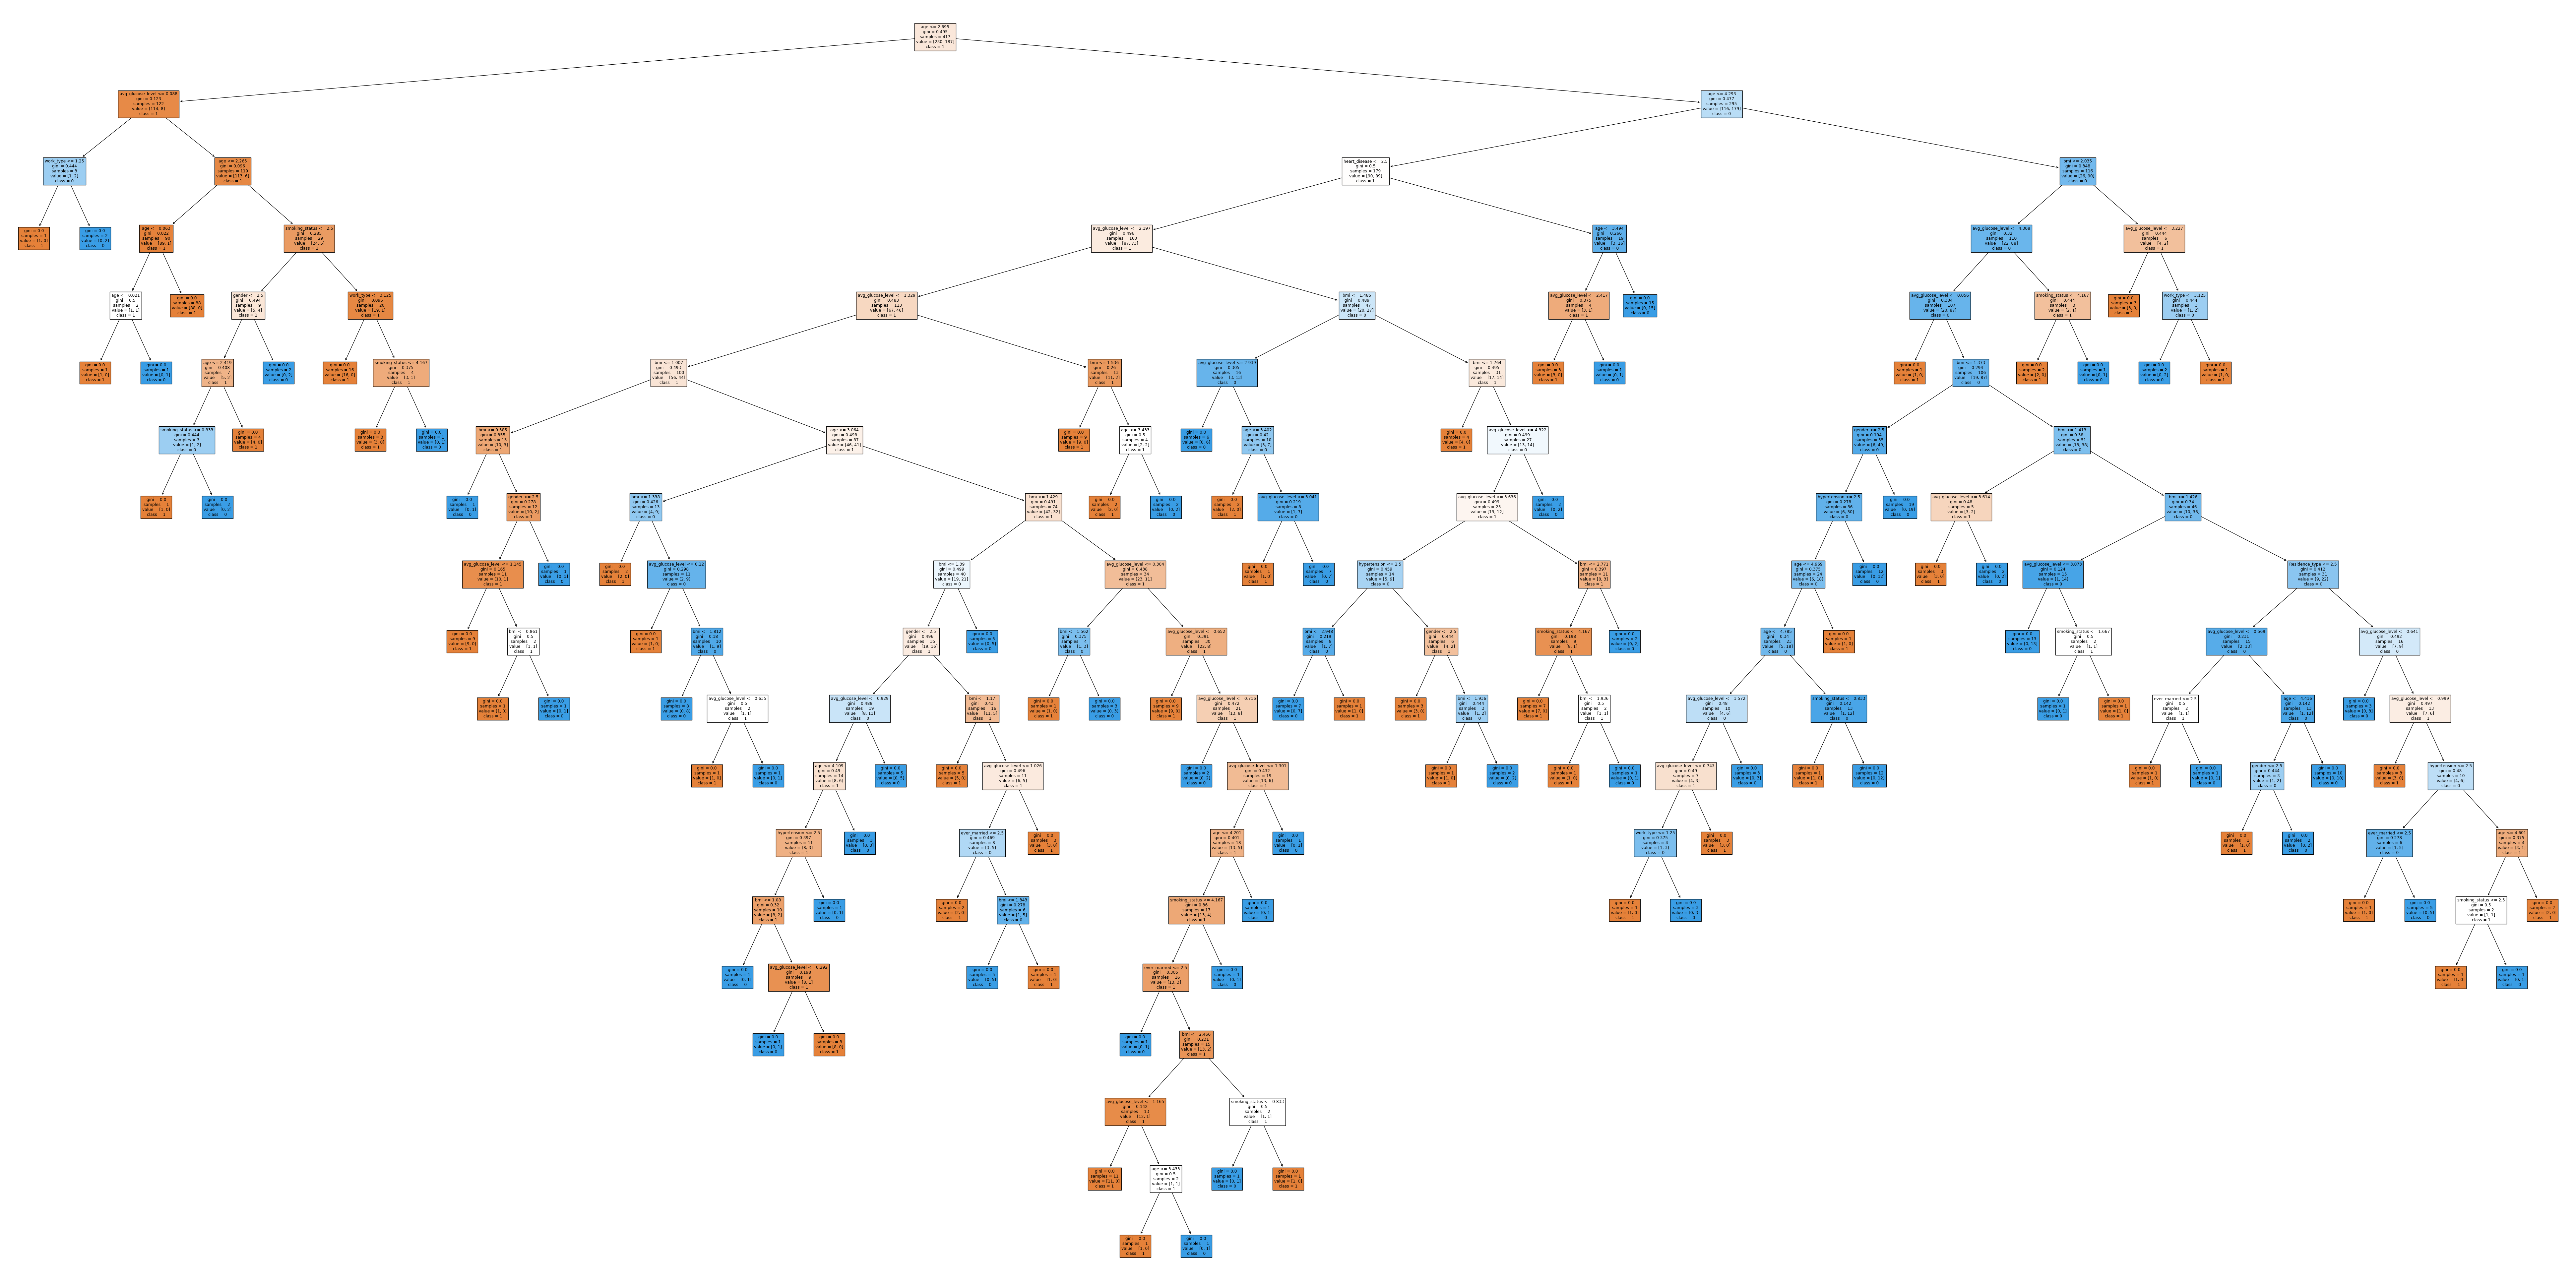

In [ ]:
from sklearn import tree
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(100,50))
_ = tree.plot_tree(dt,
                   feature_names=df.columns,
                   class_names=['1','0'],
                   filled=True)

In [ ]:
# evaluation metrics of Decision tree classifier
accuracy_d=metrics.accuracy_score(y_test,y_pred_dt)
confusion_d=metrics.confusion_matrix(y_test,y_pred_dt)
precision_d=metrics.precision_score(y_test,y_pred_dt)
recall_d=metrics.recall_score(y_test,y_pred_dt)
f1_d=metrics.f1_score(y_test,y_pred_dt)
auc_d=metrics.roc_auc_score(y_test,y_pred_dt)

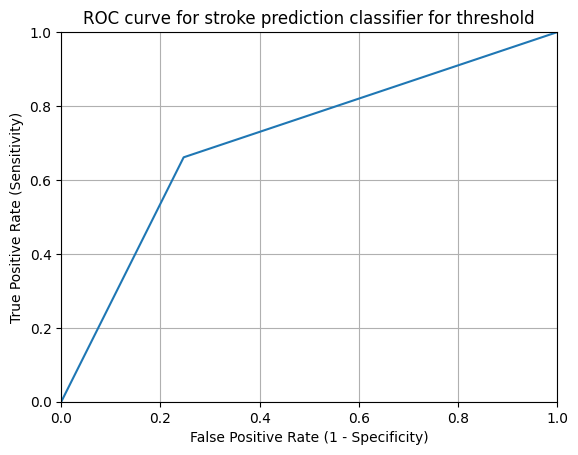

In [ ]:
y_pred_prob = dt.predict_proba(X_test)[:, 1]
y_pred_class = binarize([y_pred_prob], threshold=0.3)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred_dt)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for stroke prediction classifier for threshold')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

#### Random Forest

In [ ]:
#Random Forest - Ensemble of Descision Trees

rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [ ]:
y_pred_rf=rf.predict(X_test)

In [ ]:
# evaluation metrics of random forest
accuracy_rf=metrics.accuracy_score(y_test,y_pred_rf)
confusion_rf=metrics.confusion_matrix(y_test,y_pred_rf)
precision_rf=metrics.precision_score(y_test,y_pred_rf)
recall_rf=metrics.recall_score(y_test,y_pred_rf)
f1_rf=metrics.f1_score(y_test,y_pred_rf)
auc_rf=metrics.roc_auc_score(y_test,y_pred_rf)

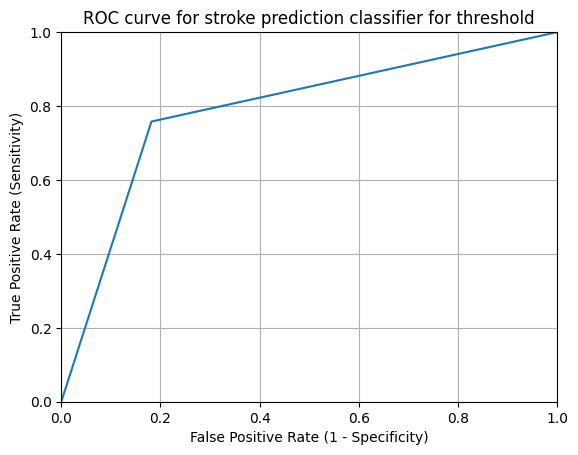

In [ ]:
y_pred_prob = rf.predict_proba(X_test)[:, 1]
y_pred_class = binarize([y_pred_prob], threshold=0.3)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred_rf)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for stroke prediction classifier for threshold')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

#### Bagging

##### 1. estimator : decisionn tree

In [ ]:
bg = BaggingClassifier(DecisionTreeClassifier(), max_samples= 0.2, max_features = 1.0, n_estimators = 10)
bg.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.2)

In [ ]:
bg.score(X_test,y_test)
y_pred_bag=bg.predict(X_test)

In [ ]:
# evaluation metrics of bagging:dt
accuracy_bag=metrics.accuracy_score(y_test,y_pred_bag)
confusion_bag=metrics.confusion_matrix(y_test,y_pred_bag)
precision_bag=metrics.precision_score(y_test,y_pred_bag)
recall_bag=metrics.recall_score(y_test,y_pred_bag)
f1_bag=metrics.f1_score(y_test,y_pred_bag)
auc_bag=metrics.roc_auc_score(y_test,y_pred_bag)

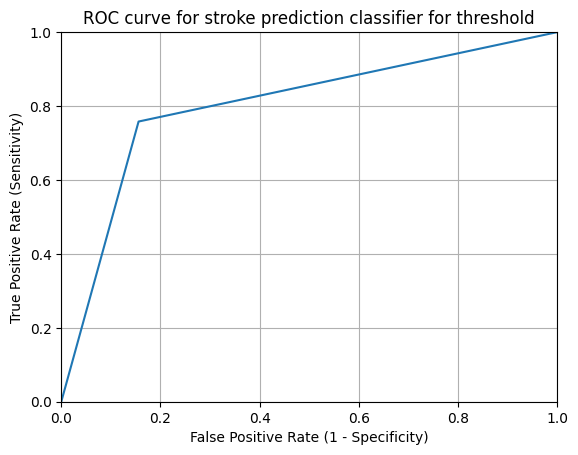

In [ ]:
y_pred_prob = bg.predict_proba(X_test)[:, 1]
y_pred_class = binarize([y_pred_prob], threshold=0.3)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred_bag)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for stroke prediction classifier for threshold')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

##### 2. estimator : knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
bg = BaggingClassifier(KNeighborsClassifier())
bg.fit(X_train,y_train)
bg.score(X_test,y_test)

0.7050359712230215

In [ ]:
y_pred_bag2=bg.predict(X_test)

In [ ]:
# evaluation metrics of bagging:knn
accuracy_bag2=metrics.accuracy_score(y_test,y_pred_bag2)
confusion_bag2=metrics.confusion_matrix(y_test,y_pred_bag2)
precision_bag2=metrics.precision_score(y_test,y_pred_bag2)
recall_bag2=metrics.recall_score(y_test,y_pred_bag2)
f1_bag2=metrics.f1_score(y_test,y_pred_bag2)
auc_bag2=metrics.roc_auc_score(y_test,y_pred_bag2)

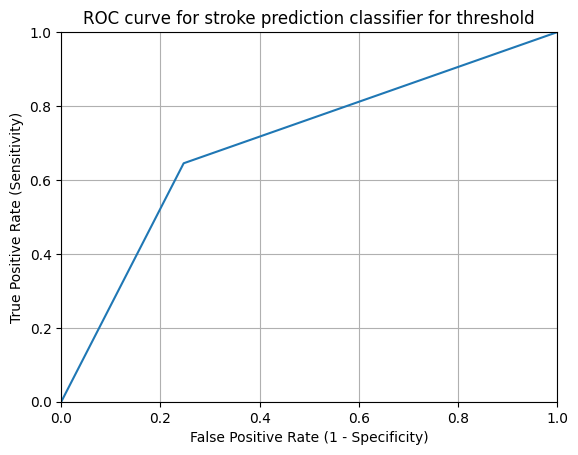

In [ ]:
y_pred_prob = bg.predict_proba(X_test)[:, 1]
y_pred_class = binarize([y_pred_prob], threshold=0.3)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred_bag2)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for stroke prediction classifier for threshold')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

##### 3.estimator :logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
bg = BaggingClassifier(LogisticRegression(solver='liblinear'))
bg.fit(X_train,y_train)
bg.score(X_test,y_test)

0.8057553956834532

In [ ]:
y_pred_bag3=bg.predict(X_test)

In [ ]:
# evaluation metrics of bagging:lr
accuracy_bag3=metrics.accuracy_score(y_test,y_pred_bag3)
confusion_bag3=metrics.confusion_matrix(y_test,y_pred_bag3)
precision_bag3=metrics.precision_score(y_test,y_pred_bag3)
recall_bag3=metrics.recall_score(y_test,y_pred_bag3)
f1_bag3=metrics.f1_score(y_test,y_pred_bag3)
auc_bag3=metrics.roc_auc_score(y_test,y_pred_bag3)

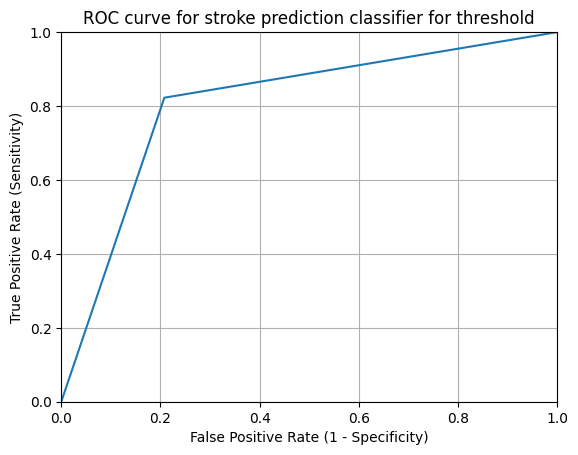

In [ ]:
y_pred_prob = bg.predict_proba(X_test)[:, 1]
y_pred_class = binarize([y_pred_prob], threshold=0.3)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred_bag3)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for stroke prediction classifier for threshold')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

### Boosting

##### 1. decision treee

In [ ]:
#Boosting - Ada Boost
adb = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators = 5, learning_rate = 0.001)
adb.fit(X_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), learning_rate=0.001,
                   n_estimators=5)

In [ ]:
adb.score(X_test,y_test)
y_pred_boo=adb.predict(X_test)

In [ ]:
# evaluation metrics of boosting:dt
accuracy_boo=metrics.accuracy_score(y_test,y_pred_boo)
confusion_boo=metrics.confusion_matrix(y_test,y_pred_boo)
precision_boo=metrics.precision_score(y_test,y_pred_boo)
recall_boo=metrics.recall_score(y_test,y_pred_boo)
f1_boo=metrics.f1_score(y_test,y_pred_boo)
auc_boo=metrics.roc_auc_score(y_test,y_pred_boo)

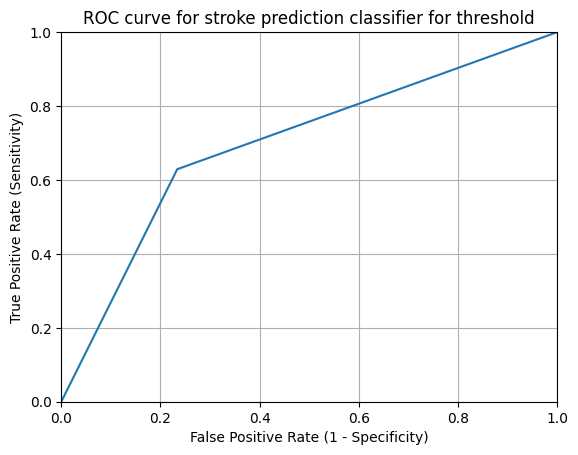

In [ ]:
y_pred_prob = adb.predict_proba(X_test)[:, 1]
y_pred_class = binarize([y_pred_prob], threshold=0.3)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred_boo)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for stroke prediction classifier for threshold')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

##### 2.logistic regression

In [ ]:
adb = AdaBoostClassifier(LogisticRegression(solver='liblinear'))
adb.fit(X_train,y_train)
adb.score(X_test,y_test)

0.7769784172661871

In [ ]:
y_pred_boo2=adb.predict(X_test)

In [ ]:
# evaluation metrics of boosting:lr
accuracy_boo2=metrics.accuracy_score(y_test,y_pred_boo2)
confusion_boo2=metrics.confusion_matrix(y_test,y_pred_boo2)
precision_boo2=metrics.precision_score(y_test,y_pred_boo2)
recall_boo2=metrics.recall_score(y_test,y_pred_boo2)
f1_boo2=metrics.f1_score(y_test,y_pred_boo2)
auc_boo2=metrics.roc_auc_score(y_test,y_pred_boo2)

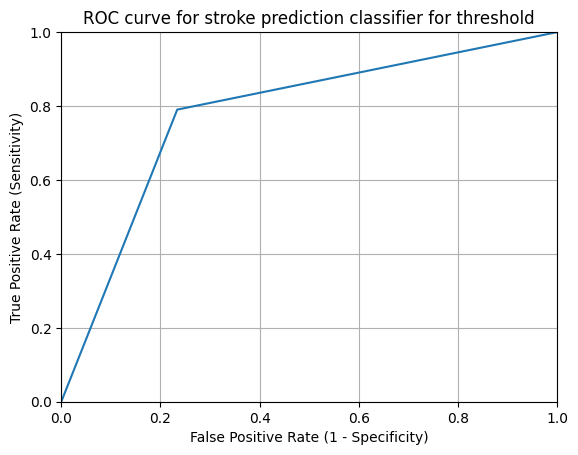

In [ ]:
y_pred_prob = adb.predict_proba(X_test)[:, 1]
y_pred_class = binarize([y_pred_prob], threshold=0.3)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred_boo2)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for stroke prediction classifier for threshold')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

#### Voting

In [ ]:
# Voting Classifier - Multiple Model Ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
lr = LogisticRegression()
dt = DecisionTreeClassifier()
svm = SVC(kernel = 'poly', degree = 2 )

In [ ]:
evc = VotingClassifier( estimators= [('lr',lr),('dt',dt),('svm',svm)], voting = 'hard')

In [ ]:
evc.fit(X_train.iloc[1:500],y_train.iloc[1:500])

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('svm', SVC(degree=2, kernel='poly'))])

In [ ]:
evc.score(X_test,y_test)
y_pred_evc=evc.predict(X_test)

In [ ]:
# evaluation metrics of evc
accuracy_evc=metrics.accuracy_score(y_test,y_pred_evc)
confusion_evc=metrics.confusion_matrix(y_test,y_pred_evc)
precision_evc=metrics.precision_score(y_test,y_pred_evc)
recall_evc=metrics.recall_score(y_test,y_pred_evc)
f1_evc=metrics.f1_score(y_test,y_pred_evc)
auc_evc=metrics.roc_auc_score(y_test,y_pred_evc)

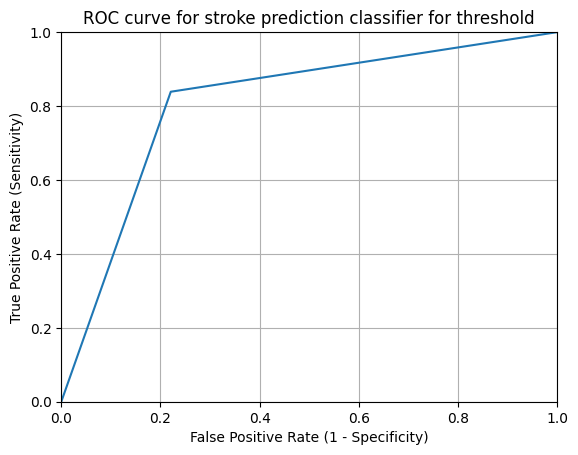

In [ ]:
y_pred_class = binarize(y_pred_prob.reshape(1, -1), threshold=0.3)[0]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred_evc)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for stroke prediction classifier for threshold')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

#### SVM

##### 1.linear kernal

In [ ]:
from sklearn import svm


In [ ]:
lf = svm.SVC(kernel='linear')

In [ ]:
lf.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
#lf.score(X_test,Y_test)
lf.score(X_train,y_train)

0.7314148681055156

In [ ]:
y_pred_lf=lf.predict(X_test)

In [ ]:
# evaluation metrics of svm:linear
accuracy_lf=metrics.accuracy_score(y_test,y_pred_lf)
confusion_lf=metrics.confusion_matrix(y_test,y_pred_lf)
precision_lf=metrics.precision_score(y_test,y_pred_lf)
recall_lf=metrics.recall_score(y_test,y_pred_lf)
f1_lf=metrics.f1_score(y_test,y_pred_lf)
auc_lf=metrics.roc_auc_score(y_test,y_pred_lf)

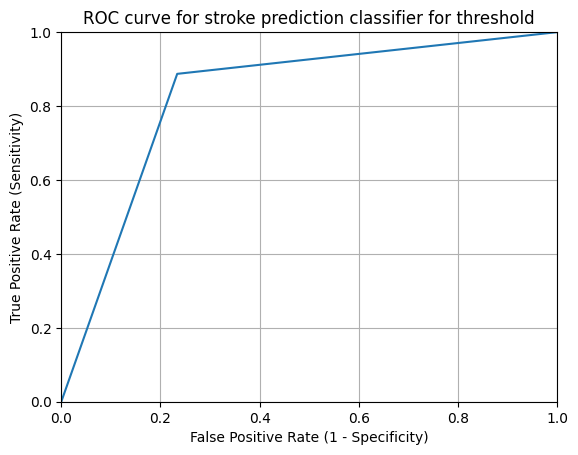

In [ ]:
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_lf], threshold=0.3)[0]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred_class)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for stroke prediction classifier for threshold')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

##### 2. polynomial kernal

In [ ]:
#Polynomial Kernel
svp = svm.SVC(kernel='poly', degree=2)
svp.fit(X_train,y_train)

SVC(degree=2, kernel='poly')

In [ ]:
svp.score(X_test,y_test)

0.8057553956834532

In [ ]:
y_pred_svp=svp.predict(X_test)


In [ ]:
# evaluation metrics of svm:poly
accuracy_svp=metrics.accuracy_score(y_test,y_pred_svp)
confusion_svp=metrics.confusion_matrix(y_test,y_pred_svp)
precision_svp=metrics.precision_score(y_test,y_pred_svp)
recall_svp=metrics.recall_score(y_test,y_pred_svp)
f1_svp=metrics.f1_score(y_test,y_pred_svp)
auc_svp=metrics.roc_auc_score(y_test,y_pred_svp)

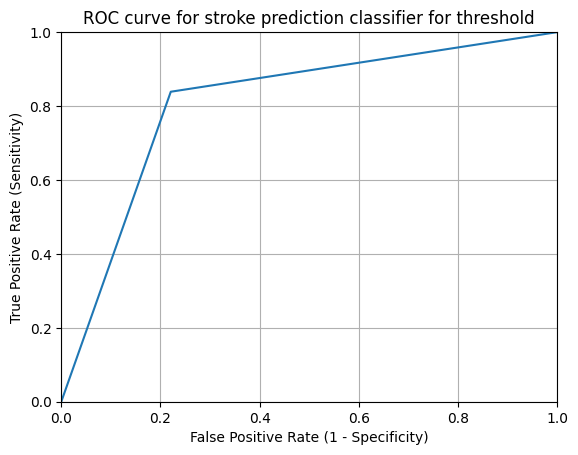

In [ ]:
y_pred_class = binarize([y_pred_svp], threshold=0.3)[0]  # Flattening the result

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred_svp)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for stroke prediction classifier for threshold')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

##### 3. Gaussian rbf kernal

In [ ]:
#Gaussian RBF Kernel

svgu = svm.SVC(kernel='rbf')
svgu.fit(X_train,y_train)
svgu.score(X_test,y_test)

0.7697841726618705

In [ ]:
y_pred_svgu=svgu.predict(X_test)

In [ ]:
# evaluation metrics of svm:rbf
accuracy_svgu=metrics.accuracy_score(y_test,y_pred_svgu)
confusion_svgu=metrics.confusion_matrix(y_test,y_pred_svgu)
precision_svgu=metrics.precision_score(y_test,y_pred_svgu)
recall_svgu=metrics.recall_score(y_test,y_pred_svgu)
f1_svgu=metrics.f1_score(y_test,y_pred_svgu)
auc_svgu=metrics.roc_auc_score(y_test,y_pred_svgu)

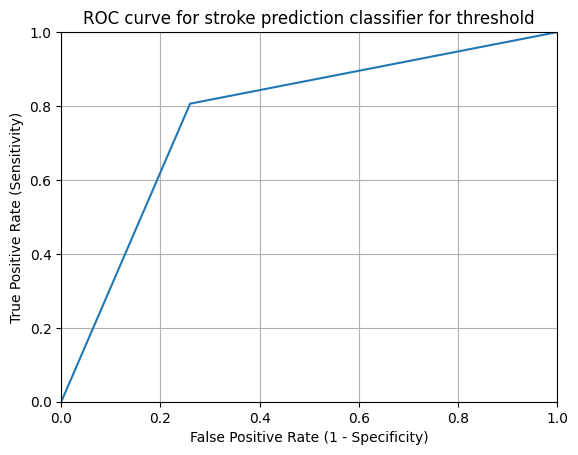

In [ ]:
y_pred_class = binarize([y_pred_svgu], threshold=0.3)[0]  # Flattening the result

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred_svgu)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for stroke prediction classifier for threshold')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

##### 4. sigmoid kernal

In [ ]:
#Sigmoid Kernel

svs = svm.SVC(kernel='sigmoid')
svs.fit(X_train,y_train)
svs.score(X_test,y_test)

0.43884892086330934

In [ ]:
y_pred_svs=svgu.predict(X_test)

In [ ]:
# evaluation metrics of svm:sigmoid
accuracy_svs=metrics.accuracy_score(y_test,y_pred_svs)
confusion_svs=metrics.confusion_matrix(y_test,y_pred_svs)
precision_svs=metrics.precision_score(y_test,y_pred_svs)
recall_svs=metrics.recall_score(y_test,y_pred_svs)
f1_svs=metrics.f1_score(y_test,y_pred_svs)
auc_svs=metrics.roc_auc_score(y_test,y_pred_svs)

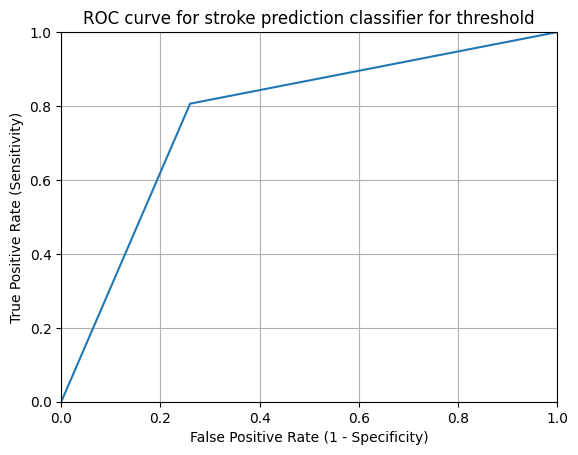

In [ ]:
y_pred_class = binarize([y_pred_svs], threshold=0.3)[0]  # Flattening the result

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred_svs)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for stroke prediction classifier for threshold')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

#### deep learning

In [ ]:
!pip install tensorflow

In [ ]:
df.shape

(556, 10)

In [ ]:
X=df
y=target
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
model = Sequential()
model.add(Dense(12, input_shape=(10,), activation='relu'))
model.add(Dense(10, activation='relu'))

model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X, y, epochs=30,validation_split=0.10,batch_size=10)
# evaluate the keras mod

_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/30
50/50 [==============================] - 3s 17ms/step - loss: 0.7581 - accuracy: 0.5480 - val_loss: 0.8372 - val_accuracy: 0.3571
Epoch 2/30
50/50 [==============================] - 1s 12ms/step - loss: 0.6791 - accuracy: 0.6260 - val_loss: 0.7720 - val_accuracy: 0.3929
Epoch 3/30
50/50 [==============================] - 1s 14ms/step - loss: 0.6419 - accuracy: 0.6740 - val_loss: 0.7408 - val_accuracy: 0.4286
Epoch 4/30
50/50 [==============================] - 1s 15ms/step - loss: 0.6231 - accuracy: 0.6880 - val_loss: 0.7053 - val_accuracy: 0.5000
Epoch 5/30
50/50 [==============================] - 1s 12ms/step - loss: 0.6078 - accuracy: 0.6920 - val_loss: 0.6583 - val_accuracy: 0.5893
Epoch 6/30
50/50 [==============================] - 0s 9ms/step - loss: 0.5980 - accuracy: 0.7080 - val_loss: 0.6212 - val_accuracy: 0.6250
Epoch 7/30
50/50 [==============================] - 0s 10ms/step - loss: 0.5855 - accuracy: 0.7200 - val_loss: 0.6074 - val_accuracy: 0.6607
Epoch 8/30
50/

In [ ]:
y_pred_dl=model.predict(X_test)
y_pred_dl= [1 if pred > 0.5 else 0 for pred in y_pred_dl]

5/5 [==============================] - 0s 3ms/step


In [ ]:
accuracy_dl=metrics.accuracy_score(y_test,y_pred_dl)
confusion_dl=metrics.confusion_matrix(y_test,y_pred_dl)
precision_dl=metrics.precision_score(y_test,y_pred_dl)
recall_dl=metrics.recall_score(y_test,y_pred_dl)
f1_dl=metrics.f1_score(y_test,y_pred_dl)
auc_dl=metrics.roc_auc_score(y_test,y_pred_dl)

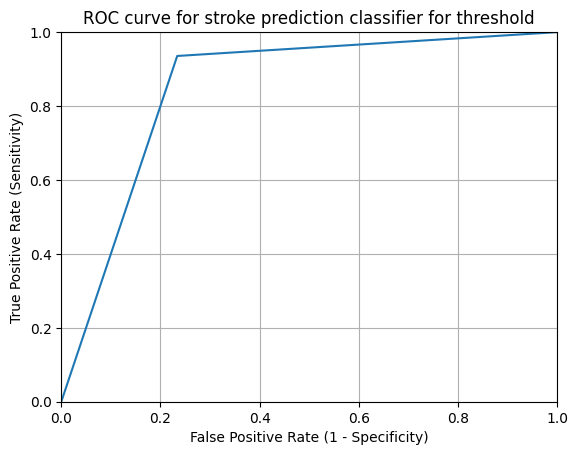

In [ ]:
y_pred_class = binarize([y_pred_dl], threshold=0.3)[0]  # Flattening the result
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred_dl)
# Plot ROC curve
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for stroke prediction classifier for threshold')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

#### Conclusion

In [ ]:
import pandas as pd

data = {
    'Model': ['Logistic regression', 'KNN', 'Naive bayes', 'Decision tree', 'Random forest',
              'Bagging:dt', 'Bagging:knn', 'Bagging:lr', 'Boosting:dt', 'Boosting:lr',
              'Voting', 'SVM linear', 'SVM polynomial', 'SVM Gaussian', 'SVM sigmoid', 'Deep learning'],
    'Accuracy': [accuracy_lb, accuracy_kb, accuracy_n, accuracy_d, accuracy_rf,
                 accuracy_bag, accuracy_bag2, accuracy_bag3, accuracy_boo, accuracy_boo2,
                 accuracy_evc, accuracy_lf, accuracy_svp, accuracy_svgu, accuracy_svs, accuracy],
    'Precision': [precision_lb, precision_kb, precision_n, precision_d, precision_rf,
                  precision_bag, precision_bag2, precision_bag3, precision_boo, precision_boo2,
                  precision_evc, precision_lf, precision_svp, precision_svgu, precision_svs, precision_dl],
    'Recall': [recall_lb, recall_kb, recall_n, recall_d, recall_rf,
               recall_bag, recall_bag2, recall_bag3, recall_boo, recall_boo2,
               recall_evc, recall_lf, recall_svp, recall_svgu, recall_svs, recall_dl],
    'F1-score': [f1_lb, f1_kb, f1_n, f1_d, f1_rf,
                 f1_bag, f1_bag2, f1_bag3, f1_boo, f1_boo2,
                 f1_evc, f1_lf, f1_svp, f1_svgu, f1_svs, f1_dl],
    'ROC AUC': [auc_lb, auc_kb, auc_n, auc_d, auc_rf,
                auc_bag, auc_bag2, auc_bag3, auc_boo, auc_boo2,
                auc_evc, auc_lf, auc_svp, auc_svgu, auc_svs, auc_dl]
}

df_c = pd.DataFrame(data)
df_c

,Model,Accuracy,Precision,Recall,F1-score,ROC AUC
0,Logistic regression,0.827338,0.756757,0.903226,0.823529,0.834730
1,KNN,0.719424,0.701754,0.645161,0.672269,0.712191
2,Naive bayes,0.769784,0.734375,0.758065,0.746032,0.768643
3,Decision tree,0.712230,0.683333,0.661290,0.672131,0.707269
4,Random forest,0.791367,0.770492,0.758065,0.764228,0.788123
5,Bagging:dt,0.805755,0.796610,0.758065,0.776860,0.801110
6,Bagging:knn,0.705036,0.677966,0.645161,0.661157,0.699204
7,Bagging:lr,0.805755,0.761194,0.822581,0.790698,0.807394
8,Boosting:dt,0.705036,0.684211,0.629032,0.655462,0.697633
9,Boosting:lr,0.776978,0.731343,0.790323,0.759690,0.778278


**Conclusion:**<br>
Multiple classification models have been applied for the "heart stroke" dataset.<br>


*   The best classification model for this dataset is logistic regression with an accuracy of 82.73%.
*   The second best classification model is SVM(linear kernel) with an accuracy of 82.01%.
*   Boosting with decision tree classifier & bagging(KNN) both give the least accuracy of 70.50%.

